# Анализ метрик моделей на датасете VK

## 1. Подготовка данных


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

with open('/content/result_metrics_vk_cup.txt', 'r') as f:
    all_lines = f.readlines()

all_lines

['ALS\n',
 '\n',
 '=========RESULTS=========\n',
 'MAP@1: 1.07117e-07\n',
 'MAP@10: 2.3688e-06\n',
 'MAP@11: 2.53788e-06\n',
 'MAP@12: 2.81486e-06\n',
 'MAP@13: 2.90287e-06\n',
 'MAP@14: 3.08373e-06\n',
 'MAP@15: 3.17343e-06\n',
 'MAP@16: 3.31839e-06\n',
 'MAP@17: 3.57059e-06\n',
 'MAP@18: 3.70561e-06\n',
 'MAP@19: 3.85412e-06\n',
 'MAP@2: 4.09436e-07\n',
 'MAP@20: 4.0455e-06\n',
 'MAP@3: 8.15913e-07\n',
 'MAP@4: 8.83843e-07\n',
 'MAP@5: 1.13946e-06\n',
 'MAP@6: 1.30585e-06\n',
 'MAP@7: 1.4446e-06\n',
 'MAP@8: 1.95621e-06\n',
 'MAP@9: 2.12968e-06\n',
 'MRR: 2.50897e-05\n',
 'NDCG: 0.000284133\n',
 'Precision@1: 1.07117e-07\n',
 'Precision@10: 1.2428e-05\n',
 'Precision@11: 1.40985e-05\n',
 'Precision@12: 1.66844e-05\n',
 'Precision@13: 1.76282e-05\n',
 'Precision@14: 1.93889e-05\n',
 'Precision@15: 2.04295e-05\n',
 'Precision@16: 2.27024e-05\n',
 'Precision@17: 2.63174e-05\n',
 'Precision@18: 2.82686e-05\n',
 'Precision@19: 3.06717e-05\n',
 'Precision@2: 7.11755e-07\n',
 'Precision@20:

In [5]:
len(all_lines)

1094

In [6]:
metrics_dict = {}
last_method_name = ''
for i in range(len(all_lines)):
    cur_line = all_lines[i].replace('\n', '')
    if len(cur_line) == 0 or '=' in cur_line:
        continue
    if ':' not in cur_line:
        last_method_name = cur_line
        continue
    name_metric, value_metric = cur_line.split(':')
    value_metric = float(value_metric)
    if metrics_dict.get(last_method_name, None) is None:
        metrics_dict[last_method_name] = {}
    metrics_dict[last_method_name][name_metric] = value_metric

In [7]:
metrics_dict.keys()

dict_keys(['ALS', 'ImplicitALS', 'SLIM', 'SVD++', 'NGCF + SLIM', 'NGCF', 'NGCF + ALS', 'NGCF + SVD++', 'NGCF + implicit ALS', 'PageRank', 'DSSM', 'RecVAE'])

In [8]:
metrics_dict['RecVAE']

{'MAP@1': 6.66309e-06,
 'MAP@10': 1.76936e-05,
 'MAP@11': 1.76936e-05,
 'MAP@12': 1.76936e-05,
 'MAP@13': 1.76936e-05,
 'MAP@14': 1.76936e-05,
 'MAP@15': 1.76936e-05,
 'MAP@16': 1.76936e-05,
 'MAP@17': 1.76936e-05,
 'MAP@18': 1.76936e-05,
 'MAP@19': 1.76936e-05,
 'MAP@2': 9.40962e-06,
 'MAP@20': 1.76936e-05,
 'MAP@3': 1.2338e-05,
 'MAP@4': 1.44991e-05,
 'MAP@5': 1.60852e-05,
 'MAP@6': 1.68533e-05,
 'MAP@7': 1.72656e-05,
 'MAP@8': 1.73852e-05,
 'MAP@9': 1.75605e-05,
 'MRR': 0.000344991,
 'NDCG': 0.000551988,
 'Precision@1': 6.66309e-06,
 'Precision@10': 4.17351e-05,
 'Precision@11': 4.17351e-05,
 'Precision@12': 4.17351e-05,
 'Precision@13': 4.17351e-05,
 'Precision@14': 4.17351e-05,
 'Precision@15': 4.17351e-05,
 'Precision@16': 4.17351e-05,
 'Precision@17': 4.17351e-05,
 'Precision@18': 4.17351e-05,
 'Precision@19': 4.17351e-05,
 'Precision@2': 1.17672e-05,
 'Precision@20': 4.17351e-05,
 'Precision@3': 1.97184e-05,
 'Precision@4': 2.65374e-05,
 'Precision@5': 3.22828e-05,
 'Precision@

In [10]:
df = pd.DataFrame(metrics_dict)
df

,ALS,ImplicitALS,SLIM,SVD++,NGCF + SLIM,NGCF,NGCF + ALS,NGCF + SVD++,NGCF + implicit ALS,PageRank,DSSM,RecVAE
MAP@1,0.000002,0.000001,0.000001,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,1.196260e-07,0.000001,0.000007
MAP@10,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@11,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@12,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@13,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@14,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@15,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@16,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@17,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@18,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018


## 2. Сравнение метрик подхода X и NGCF + X

In [11]:
methods = 'ALS ImplicitALS SLIM	SVD++'.split()


In [22]:
metrics_dict.keys()

dict_keys(['ALS', 'ImplicitALS', 'SLIM', 'SVD++', 'NGCF + SLIM', 'NGCF', 'NGCF + ALS', 'NGCF + SVD++', 'NGCF + implicit ALS', 'PageRank', 'DSSM', 'RecVAE'])

In [23]:
method2ngcf_method = {
    'ALS' : 'NGCF + ALS',
    'ImplicitALS' : 'NGCF + implicit ALS', 
    'SLIM' : 'NGCF + SLIM',
    'SVD++' : 'NGCF + SVD++'
}

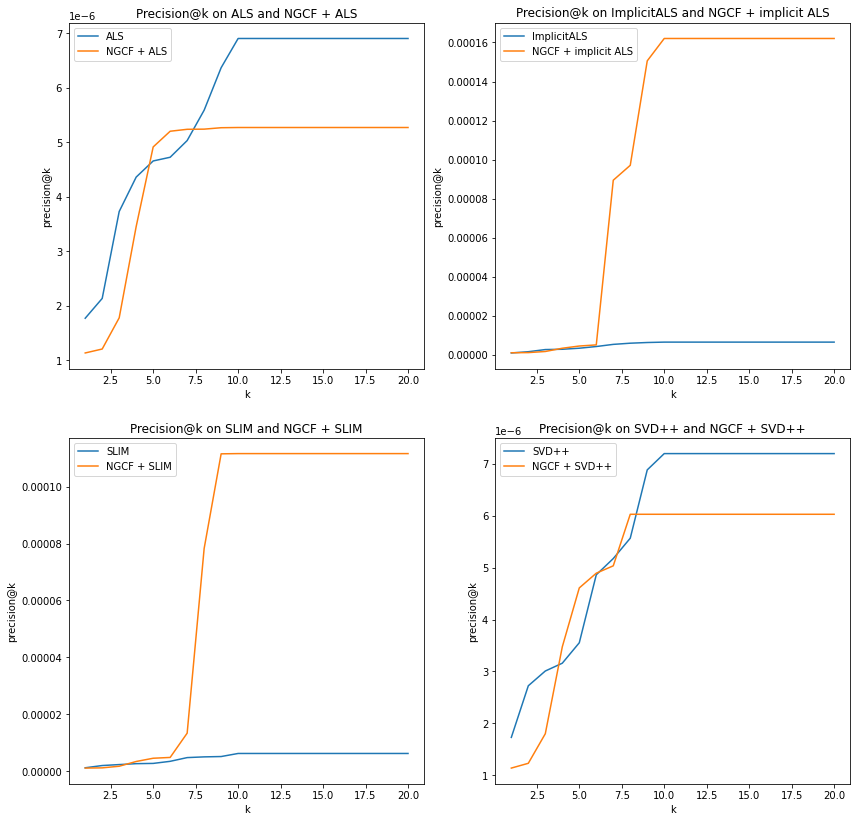

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df.index: 
        if 'Precision' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"Precision@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("precision@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

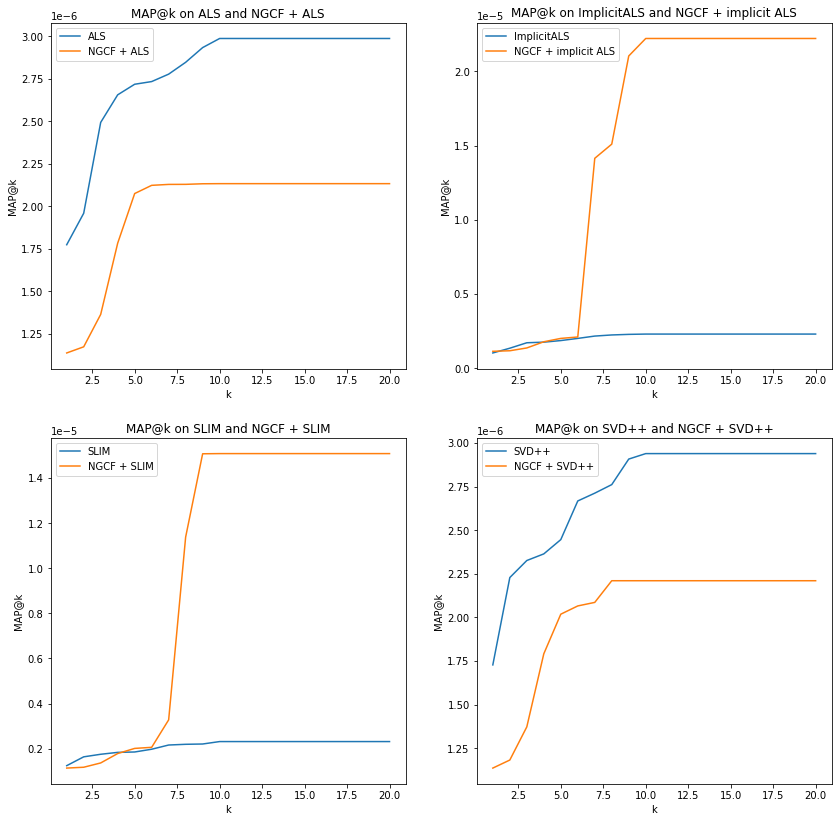

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df.index: 
        if 'MAP' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"MAP@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("MAP@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

## 3. Сравнение подходов

In [32]:
metrics = ['MAP@1', 'MAP@10', 'MAP@20', 'MRR', 'NDCG', 'Precision@1', 'Precision@10', 'Precision@20']

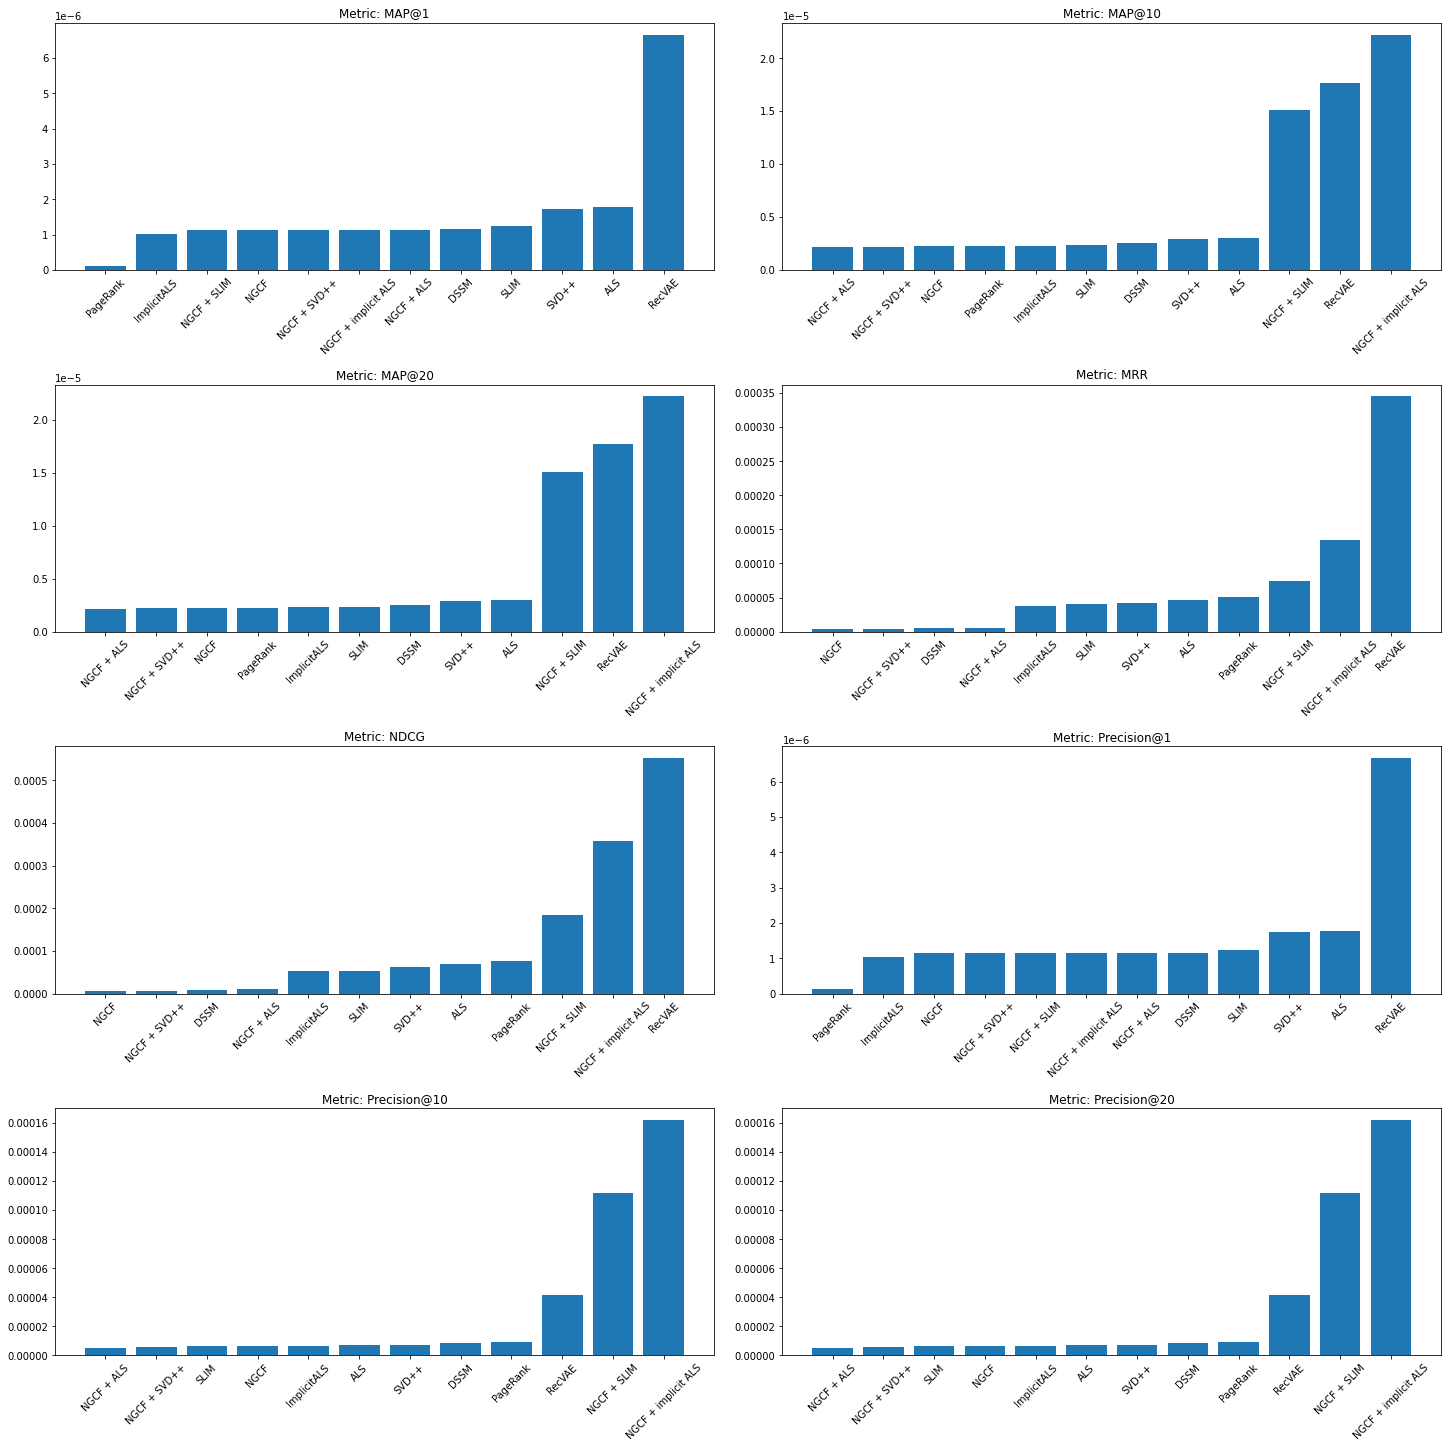

In [66]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout = True)

for i, metric in enumerate(metrics):
    df = df.sort_values(by=metric, axis=1)
    x = df.loc[metric].index
    y = df.loc[metric].values
    axs[i // 2, i % 2].set_title(f"Metric: {metric}")
    axs[i // 2, i % 2].bar(x, y)
    for tick in axs[i // 2, i % 2].get_xticklabels():
        tick.set_rotation(45)

    axs[i // 2, i % 2].plot()
   
